Support Vector Machine (SVM)

Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [3]:
dataset = pd.read_csv('social_network_ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

Spliting the dataset into the Training set & Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Fitting SVM to the Training set

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Predicting the Test set results

In [7]:
y_pred = classifier.predict(X_test)
print(y_pred)

print("accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("classification: {}".format(classification_report(y_test, y_pred)))

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]
accuracy: 0.9
classification:               precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("confusion: {}".format(cm))

confusion: [[66  2]
 [ 8 24]]


Visualising the Training set results

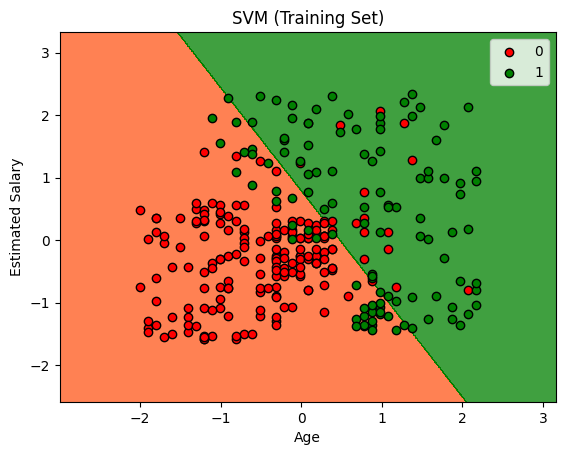

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#ff5719', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j, edgecolor='black')
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results

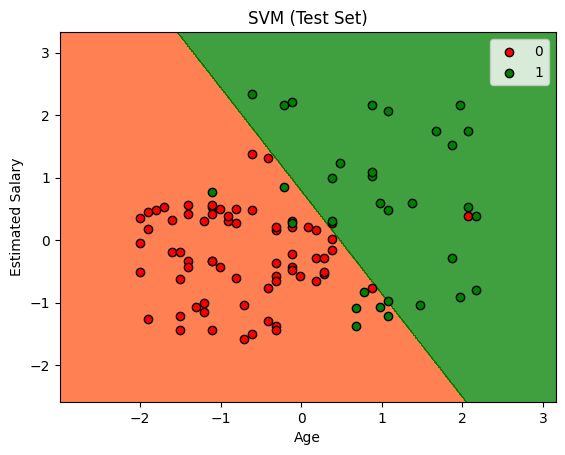

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#ff5719', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j, edgecolor='black')
plt.title('SVM (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()